In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.dates as dates
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import FontProperties
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
%matplotlib inline
def tax(weight):
    return abs(weight-weight.shift(1)).fillna(0).sum().sum()
def cum_return(weight,ret):
    return np.cumprod((weight.shift(1)*ret).sum(axis=1)[1:])
def cum_return_tax(weight,ret):
    return np.cumprod((weight.shift(1)*ret.sub(abs(weight-weight.shift(1)).fillna(0).sum(axis=1)*0.002,axis=0)).sum(axis=1)[1:])

C:\Users\Sascha683\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import datetime
import time
def print_date(i):
    days = datetime.timedelta(weeks=i)
    end = start + days
    if  i+1 == int(last_week):
        weeks[i+1] = [end,last_day]
    else:
        weeks[i+1] = [end,end + datetime.timedelta(6)]
def allweeks():
    for i in range(0, int(last_week)):
        print_date(i)
    return weeks  
def main():
    allweeks()
    for (k,week) in weeks.items():
        num = k+1<=9 and "0"+str(k+1) or str(k+1)
        print "%s\t%s\t%s\t" %(str(current.year)+num,str(week[0]),str(week[1]))
current = datetime.datetime.now()
start = datetime.date(current.year,1,1)
last_day = datetime.date(current.year,12,31)
isfirst = start.weekday()
last_week = last_day.strftime('%W')
weeks={}
if isfirst !=0:
    end = datetime.timedelta(7-start.weekday()-1)
    weeks[0]=[start,start+end]
else:
    end = datetime.timedelta(6)
    weeks[0]=[start,start+end]
start += datetime.timedelta(7 - start.weekday())
main()

201901	2019-01-01	2019-01-06	
201902	2019-01-07	2019-01-13	
201903	2019-01-14	2019-01-20	
201904	2019-01-21	2019-01-27	
201905	2019-01-28	2019-02-03	
201906	2019-02-04	2019-02-10	
201907	2019-02-11	2019-02-17	
201908	2019-02-18	2019-02-24	
201909	2019-02-25	2019-03-03	
201910	2019-03-04	2019-03-10	
201911	2019-03-11	2019-03-17	
201912	2019-03-18	2019-03-24	
201913	2019-03-25	2019-03-31	
201914	2019-04-01	2019-04-07	
201915	2019-04-08	2019-04-14	
201916	2019-04-15	2019-04-21	
201917	2019-04-22	2019-04-28	
201918	2019-04-29	2019-05-05	
201919	2019-05-06	2019-05-12	
201920	2019-05-13	2019-05-19	
201921	2019-05-20	2019-05-26	
201922	2019-05-27	2019-06-02	
201923	2019-06-03	2019-06-09	
201924	2019-06-10	2019-06-16	
201925	2019-06-17	2019-06-23	
201926	2019-06-24	2019-06-30	
201927	2019-07-01	2019-07-07	
201928	2019-07-08	2019-07-14	
201929	2019-07-15	2019-07-21	
201930	2019-07-22	2019-07-28	
201931	2019-07-29	2019-08-04	
201932	2019-08-05	2019-08-11	
201933	2019-08-12	2019-08-18	
201934	201

In [69]:
start=datetime.date(2003,1,1)
last_day=datetime.date(2019,1,19)
isfirst=start.weekday()
week_start=[]
week_end=[]
if isfirst!=0:
    start=start+datetime.timedelta(7-start.weekday())
week_num=(last_day-start).days/7
for i in range(week_num+1):
    week_start.append(start)
    week_end.append(start+datetime.timedelta(6))
    start=start+datetime.timedelta(7)
week_end

[datetime.date(2003, 1, 12),
 datetime.date(2003, 1, 19),
 datetime.date(2003, 1, 26),
 datetime.date(2003, 2, 2),
 datetime.date(2003, 2, 9),
 datetime.date(2003, 2, 16),
 datetime.date(2003, 2, 23),
 datetime.date(2003, 3, 2),
 datetime.date(2003, 3, 9),
 datetime.date(2003, 3, 16),
 datetime.date(2003, 3, 23),
 datetime.date(2003, 3, 30),
 datetime.date(2003, 4, 6),
 datetime.date(2003, 4, 13),
 datetime.date(2003, 4, 20),
 datetime.date(2003, 4, 27),
 datetime.date(2003, 5, 4),
 datetime.date(2003, 5, 11),
 datetime.date(2003, 5, 18),
 datetime.date(2003, 5, 25),
 datetime.date(2003, 6, 1),
 datetime.date(2003, 6, 8),
 datetime.date(2003, 6, 15),
 datetime.date(2003, 6, 22),
 datetime.date(2003, 6, 29),
 datetime.date(2003, 7, 6),
 datetime.date(2003, 7, 13),
 datetime.date(2003, 7, 20),
 datetime.date(2003, 7, 27),
 datetime.date(2003, 8, 3),
 datetime.date(2003, 8, 10),
 datetime.date(2003, 8, 17),
 datetime.date(2003, 8, 24),
 datetime.date(2003, 8, 31),
 datetime.date(2003, 9, 

In [139]:
TWSE_LOW2=pd.read_csv("TWSE_LOW2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_HIGH2=pd.read_csv("TWSE_HIGH2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_CLOSE2=pd.read_csv("TWSE_CLOSE2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_OPEN2=pd.read_csv("TWSE_OPEN2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_VOLUME2=pd.read_csv("TWSE_VOLUME2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
TWSE_VOLUME_VALUE2=pd.read_csv("TWSE_VOLUME_VALUE2.csv",index_col=0,header=0,parse_dates=True,thousands=',',encoding='ISO-8859-1')
risk_free=pd.read_csv("USD3M.csv",index_col=0,header=0,parse_dates=True)
risk_free=risk_free.loc[TWSE_CLOSE2.index].fillna(method='ffill')

In [140]:
TWSE_index=pd.read_excel("Z:Sascha683/TWSE_CLOSE_ADJ.xlsx",header=None,index_col=0,parse_dates=True)
TWSE_index=TWSE_index[1]
TWSE_return=(TWSE_index/TWSE_index.shift(1)).fillna(1)

In [201]:
TWSE_WEIGHT=pd.read_csv("TWSE_WEIGHT.csv",header=None)

In [141]:
company_name=[]
for i in range(len(TWSE_LOW2.columns)):
    company_name.append(TWSE_LOW2.columns[i][:4])
TWSE_LOW2.columns=company_name
TWSE_HIGH2.columns=company_name
TWSE_CLOSE2.columns=company_name
TWSE_OPEN2.columns=company_name
TWSE_VOLUME2.columns=company_name
TWSE_VOLUME_VALUE2.columns=company_name

In [98]:
#pd.DataFrame(TWSE_LOW2.columns.tolist()).to_excel("big_company_name.xlsx")

In [99]:
high_point=pd.DataFrame(columns=TWSE_CLOSE2.columns)
for i in range(249,TWSE_CLOSE2.shape[0]):
    high_point.loc[TWSE_CLOSE2.index[i]]=TWSE_CLOSE2.iloc[i-249:i,:].max()
relative_high=TWSE_CLOSE2.loc["2004-01-01":].div(high_point)

In [167]:
high_point

,2317,6505,2412,2882,2330,1301,1303,1326,3008,2881,...,2461,1533,9943,2321,3040,1109,1217,1459,2906,2848
2004-01-02,25.64,23.18,24.70,27.11,30.74,19.80,18.65,19.32,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.68,20.7
2004-01-05,25.64,24.31,24.70,27.11,30.74,19.97,18.92,19.32,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.68,20.7
2004-01-06,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.68,20.7
2004-01-07,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.68,20.7
2004-01-08,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.72,20.7
2004-01-09,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.74,20.7
2004-01-12,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.74,20.7
2004-01-13,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.92,6.44,11.22,7.95,3.74,20.7
2004-01-14,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.86,6.44,11.22,7.95,3.74,20.7
2004-01-15,25.64,24.76,24.70,27.11,30.74,20.50,19.03,19.49,221.56,17.17,...,31.22,35.39,14.55,25.87,20.86,6.44,11.22,7.95,3.77,20.7


In [435]:
TWSE_CLOSE_trend=pd.DataFrame(columns=company_name)
TWSE_CLOSE_mean=pd.DataFrame(columns=company_name)
TWSE_index_week=pd.DataFrame(columns=["price"])
TWSE_index_mean=pd.DataFrame(columns=["mean"])
TWSE_index_trend=pd.DataFrame(columns=["trend"])
TWSE_VOLUME2_mean=pd.DataFrame(columns=company_name)
week_start_price=pd.DataFrame(columns=company_name)
week_end_price=pd.DataFrame(columns=company_name)
TWSE_CLOSE_trend_month=pd.DataFrame(columns=company_name)
relative_high_week=pd.DataFrame(columns=company_name)
non_trade=[]
non_trade2=[]
for i in range(len(week_start)):
    try:
        TWSE_CLOSE_trend.loc[week_end[i]]=TWSE_CLOSE2.loc[week_start[i]:week_end[i]].iloc[-1]/TWSE_CLOSE2.loc[week_start[i]:week_end[i]].mean()
        TWSE_CLOSE_mean.loc[week_end[i]]=TWSE_CLOSE2.loc[week_start[i]:week_end[i]].mean()
        TWSE_index_week.loc[week_end[i]]=TWSE_index[week_start[i]:week_end[i]].iloc[-1]
        TWSE_index_mean.loc[week_end[i]]=TWSE_index[week_start[i]:week_end[i]].mean()
        TWSE_index_trend.loc[week_end[i]]=TWSE_index[week_start[i]:week_end[i]][-1]/TWSE_index[week_start[i]:week_end[i]].mean()
        TWSE_VOLUME2_mean.loc[week_end[i]]=TWSE_VOLUME2.loc[week_start[i]:week_end[i]].mean()
        week_start_price.loc[week_start[i]]=TWSE_OPEN2.loc[week_start[i]:week_end[i]].iloc[0,:]
        week_end_price.loc[week_end[i]]=TWSE_CLOSE2.loc[week_start[i]:week_end[i]].iloc[-1,:]
        relative_high_week.loc[week_end[i]]=relative_high.loc[week_start[i]:week_end[i]].mean()
        if i>2:
            TWSE_CLOSE_trend_month
    except:
        non_trade.append(week_start[i])
        non_trade2.append(week_end[i])
        continue

In [436]:
TWSE_CLOSE_mean.index=pd.to_datetime(TWSE_CLOSE_mean.index)
TWSE_CLOSE_trend.index=pd.to_datetime(TWSE_CLOSE_trend.index)
TWSE_index_mean.index=pd.to_datetime(TWSE_index_mean.index)
TWSE_index_week.index=pd.to_datetime(TWSE_index_week.index)
TWSE_index_trend.index=pd.to_datetime(TWSE_index_trend.index)
TWSE_VOLUME2_mean.index=pd.to_datetime(TWSE_VOLUME2_mean.index)
week_start_price.index=pd.to_datetime(week_start_price.index)
week_end_price.index=pd.to_datetime(week_end_price.index)
relative_high_week.index=pd.to_datetime(week_end_price.index)

In [437]:
long_return=(week_end_price/week_end_price.shift(1)).loc["2004-01-01":]
TWSE_CLOSE_mean_return=(TWSE_CLOSE_mean/TWSE_CLOSE_mean.shift(4)).loc["2004-01-01":]
TWSE_CLOSE_trend=TWSE_CLOSE_trend.loc["2004-01-01":]
comparetoindex=TWSE_CLOSE_trend.sub(TWSE_index_trend["trend"],axis=0)
comparetoindex=comparetoindex.loc["2004-01-01":]
relative_high_week=relative_high_week.loc["2004-01-01":]
decision_day=comparetoindex.index
long_return["cash"]=pd.Series(np.ones(long_return.shape[0]),index=long_return.index)
long_return=long_return.fillna(1)
short_return=1/long_return

In [438]:
for i in range(len(non_trade)):
    week_start.remove(non_trade[i])
    week_end.remove(non_trade2[i])

In [202]:
TWSE_WEIGHT

,0,1,2,3,4,5,6,7,8,9,...,884,885,886,887,888,889,890,891,892,893
0,1101 TT,1102 TT,1103 TT,1104 TT,1108 TT,1109 TT,1110 TT,1201 TT,1203 TT,1210 TT,...,9939 TT,9940 TT,9941 TT,9942 TT,9943 TT,9944 TT,9945 TT,9946 TT,9955 TT,9958 TT
1,0.628117,0.394186,0.036396,0.042669,0.010261,0.0163,0.033489,0.038893,0.021554,0.091175,...,0.048052,0.074827,0.085943,0.019418,0.029462,0.006143,0.155074,0.01209,0.004314,0.046151
2,1101 TT,1102 TT,1103 TT,1104 TT,1108 TT,1109 TT,1110 TT,1201 TT,1203 TT,1210 TT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.489155,0.299566,0.032687,0.047404,0.010706,0.014902,0.026663,0.033824,0.019113,0.078076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1101 TT,1102 TT,1103 TT,1104 TT,1108 TT,1109 TT,1110 TT,1201 TT,1203 TT,1210 TT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.478492,0.326568,0.024938,0.057672,0.013609,0.01397,0.033743,0.032652,0.020352,0.079008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1101 TT,1102 TT,1103 TT,1104 TT,1108 TT,1109 TT,1110 TT,1201 TT,1203 TT,1210 TT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.413561,0.377896,0.030343,0.058001,0.016772,0.015624,0.037081,0.036336,0.02255,0.062543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1101 TT,1102 TT,1103 TT,1104 TT,1108 TT,1109 TT,1110 TT,1201 TT,1203 TT,1210 TT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.59866,0.489778,0.041067,0.059373,0.015575,0.020998,0.036329,0.047266,0.02134,0.075795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [318]:
candidate_long=pd.DataFrame(columns=company_name)
year_now=(2019-decision_day[0].year)*2
top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
for j in range(len(top_weight)):
    top_weight[j]=top_weight[j][:4]
for i in range(len(decision_day)):
    year_now=(2019-decision_day[i].year)*2
    if year_now!=(2019-decision_day[i-1].year)*2 and i>0:
        top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
        for j in range(len(top_weight)):
            top_weight[j]=top_weight[j][:4]
    candidate_long.loc[decision_day[i]]=np.zeros(len(company_name))
    for j in range(len(company_name)):
        if (candidate_long.iloc[i,j]==0):
            if(TWSE_CLOSE_mean_return.iloc[i,j]>1 and comparetoindex.iloc[i,j]>0):
                candidate_long.loc[decision_day[i],comparetoindex.columns[j]]=1
            else:
                candidate_long.loc[decision_day[i],comparetoindex.columns[j]]=0
        else:
            if(TWSE_CLOSE_mean_return.iloc[i,j]<1 and comparetoindex.iloc[i,j]<0):
                candidate_long.loc[decision_day[i],comparetoindex.columns[j]]=0
            else:
                candidate_long.loc[decision_day[i],comparetoindex.columns[j]]=1

In [319]:
weight_week=pd.DataFrame(columns=company_name)
for i in range(candidate_long.shape[0]):
    if candidate_long.sum(axis=1)[i]>20:
        top_20=(relative_high_week)[candidate_long.iloc[i,:][candidate_long.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight_week.loc[decision_day[i]]=np.zeros(comparetoindex.shape[1])
        weight_week.loc[decision_day[i],top_20]=0.05
    else:
        weight_week.loc[decision_day[i]]=(candidate_long.iloc[i,:]/20).fillna(0)
weight_week["cash"]=1-weight_week.sum(axis=1)

In [320]:
candidate_long

,2317,6505,2412,2882,2330,1301,1303,1326,3008,2881,...,2461,1533,9943,2321,3040,1109,1217,1459,2906,2848
2004-01-04,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-01-11,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2004-01-18,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2004-02-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2004-02-08,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2004-02-15,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-02-22,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2004-02-29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004-03-07,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2004-03-14,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [321]:
long_return_allocation=(weight_week.shift(1)*long_return)[1:].sum(axis=1)
long_price=cum_return_tax(weight_week,long_return)

In [322]:
long_price

2004-01-11    1.036572
2004-01-18    1.083672
2004-02-01    1.110325
2004-02-08    1.179417
2004-02-15    1.149516
2004-02-22    1.225974
2004-02-29    1.260240
2004-03-07    1.284778
2004-03-14    1.274899
2004-03-21    1.301503
2004-03-28    1.056720
2004-04-04    1.113539
2004-04-11    1.126834
2004-04-18    1.130912
2004-04-25    1.074284
2004-05-02    0.995732
2004-05-09    0.979644
2004-05-16    0.939889
2004-05-23    0.938737
2004-05-30    0.936872
2004-06-06    0.904841
2004-06-13    0.900376
2004-06-20    0.869201
2004-06-27    0.891632
2004-07-04    0.898441
2004-07-11    0.909818
2004-07-18    0.885451
2004-07-25    0.883073
2004-08-01    0.876748
2004-08-08    0.863337
                ...   
2018-07-01    7.780898
2018-07-08    7.630583
2018-07-15    7.710056
2018-07-22    7.644620
2018-07-29    7.662596
2018-08-05    7.657919
2018-08-12    7.710651
2018-08-19    7.697465
2018-08-26    7.797051
2018-09-02    7.923682
2018-09-09    7.729248
2018-09-16    7.814354
2018-09-23 

In [107]:
candidate_short=pd.DataFrame(columns=company_name)
for i in range(len(decision_day)):
    candidate_short.loc[decision_day[i]]=np.zeros(len(company_name))
    for j in range(len(company_name)):
        if (candidate_short.iloc[i,j]==0):
            if(TWSE_CLOSE_mean_return.iloc[i,j]<1 and comparetoindex.iloc[i,j]<0):
                candidate_short.loc[decision_day[i],comparetoindex.columns[j]]=1
            else:
                candidate_short.loc[decision_day[i],comparetoindex.columns[j]]=0
        else:
            if(TWSE_CLOSE_mean_return.iloc[i,j]>1 and comparetoindex.iloc[i,j]>0):
                candidate_short.loc[decision_day[i],comparetoindex.columns[j]]=0
            else:
                candidate_short.loc[decision_day[i],comparetoindex.columns[j]]=1

In [108]:
weight_week_short=pd.DataFrame(columns=company_name)
for i in range(candidate_short.shape[0]):
    if candidate_short.sum(axis=1)[i]>20:
        top_20=(relative_high_week)[candidate_short.iloc[i,:][candidate_short.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[-20:].index
        weight_week_short.loc[decision_day[i]]=np.zeros(comparetoindex.shape[1])
        weight_week_short.loc[decision_day[i],top_20]=0.05
    else:
        weight_week_short.loc[decision_day[i]]=(candidate_short.iloc[i,:]/20).fillna(0)
weight_week_short["cash"]=1-weight_week_short.sum(axis=1)

In [109]:
short_return_allocation=(weight_week_short.shift(1)*short_return)[1:].sum(axis=1)
short_price=cum_return_tax(weight_week_short,short_return)

In [261]:
TWSE_allfirm=pd.read_excel("TWSE_allfirm.xlsx",index_col=0)

In [262]:
TWSE_allfirm_price=(TWSE_allfirm/100+1).cumprod()

In [ ]:
company_name_allfirm=[]
for i in range(len(TWSE_allfirm_price.columns)):
    company_name_allfirm.append(TWSE_allfirm_price.columns[i][:4])
TWSE_allfirm_price.columns=company_name_allfirm

In [263]:
TWSE_allfirm_price

,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,
2003-01-02,1.038278,1.026515,1.064846,1.066265,1.067308,1.021622,1.069231,1.033981,1.006711,1.024390,...,0.990196,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,1.110048,1.075757,1.064846,1.138555,1.134616,1.043244,1.138462,1.053398,1.020133,1.034146,...,0.990196,0.949580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,1.186603,1.143938,1.133106,1.216868,1.211539,1.113514,1.215385,1.126213,1.046979,1.078049,...,0.990196,0.966387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,1.267943,1.159090,1.119454,1.186748,1.211539,1.086487,1.261539,1.165048,1.026845,1.043903,...,0.983660,0.941176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,1.354068,1.234847,1.126281,1.259037,1.288462,1.124325,1.346155,1.242719,1.067114,1.082927,...,0.977123,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-09,1.406699,1.234847,1.153584,1.277110,1.288462,1.102703,1.338463,1.252428,1.026845,1.053659,...,0.967320,1.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-10,1.377991,1.204544,1.126280,1.228917,1.288462,1.091892,1.261540,1.339806,1.087248,1.092683,...,0.977124,1.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-13,1.454547,1.212119,1.105802,1.228917,1.278846,1.156757,1.292309,1.315534,1.161073,1.087805,...,0.973856,0.991596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-14,1.521533,1.196968,1.098976,1.228917,1.317308,1.156757,1.276924,1.349515,1.228187,1.082928,...,0.990196,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
TWSE_allfirm_year_return=TWSE_allfirm_price/TWSE_allfirm_price.shift(249)

In [265]:
TWSE_allfirm_year_return

,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,
2003-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
panal_data2=TWSE_allfirm_year_return.sub((risk_free*0.01+1)["yield"],axis=0).loc["2004-01-01":]

In [145]:
panal_data=((TWSE_CLOSE2/TWSE_CLOSE2.shift(249)).sub((risk_free*0.01+1)["yield"],axis=0)).loc["2004-01-01":]

In [146]:
timing_test=[]
for i in range(panal_data2.shape[0]):
    rm_rf_day=TWSE_return.loc[panal_data2.index[i]]-(risk_free["yield"].loc[panal_data2.index[i]]*0.01+1)
    rm_rf_2=rm_rf_day**2
    temp=pd.DataFrame([rm_rf_day,rm_rf_2]).T
    y=panal_data2.iloc[i,:].dropna()
#    x=capm_predict.iloc[i,:][y.index]
#    x=pd.concat([x,x**2],axis=1)
    x=pd.DataFrame()
    for j in range(len(y)):
        x=pd.concat([x,temp])
#    X=sm.add_constant(x)
    y=list(y)
    model = sm.OLS(y,x)
    results = model.fit()
    timing_test.append(results.params[1])

In [148]:
z_score=(pd.rolling_mean(pd.DataFrame(timing_test),window=10)-pd.rolling_mean(pd.DataFrame(timing_test),window=200))/pd.rolling_std(pd.DataFrame(timing_test),window=200)
z_score.index=panal_data.index
z_score=z_score.dropna()

C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=200,center=False).mean()
  """Entry point for launching an IPython kernel.
C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=200,center=False).std()
  """Entry point for launching an IPython kernel.


In [149]:
weight_longshort=pd.DataFrame(columns=["long","short","cash"])
for i in range(40,len(long_return_allocation)):
    if z_score.loc[long_return_allocation.index[i-1]:long_return_allocation.index[i]][0][-1]<-1:
        weight_longshort.loc[long_return_allocation.index[i]]=[0,0.5,0.5]
    elif z_score.loc[long_return_allocation.index[i-1]:long_return_allocation.index[i]][0][-1]>0:
        weight_longshort.loc[long_return_allocation.index[i]]=[1,0,0]
    else :
        weight_longshort.loc[long_return_allocation.index[i]]=[0.5,0.25,0.25]

In [150]:
return_longshort=pd.concat([(long_price/long_price.shift(1))[40:],(short_price/short_price.shift(1))[40:],pd.DataFrame(np.ones(len(long_price)-40),index=long_price.index[40:])],axis=1)
return_longshort.columns=["long","short","cash"]

In [151]:
return_longshort

,long,short,cash
2004-10-24,0.979565,1.013530,1.0
2004-10-31,0.996974,1.063878,1.0
2004-11-07,1.018463,0.987757,1.0
2004-11-14,1.000315,0.977506,1.0
2004-11-21,0.979875,0.960468,1.0
2004-11-28,0.955431,1.068465,1.0
2004-12-05,1.005970,1.041426,1.0
2004-12-12,0.999818,0.980571,1.0
2004-12-19,1.004042,0.936203,1.0
2004-12-26,1.002461,1.007361,1.0


In [152]:
longshort_price=cum_return_tax(weight_longshort,return_longshort)
longshort_price

2004-10-31     1.031939
2004-11-07     1.025622
2004-11-14     1.014087
2004-11-21     0.994042
2004-11-28     1.028071
2004-12-05     1.049365
2004-12-12     1.039171
2004-12-19     1.006023
2004-12-26     1.007714
2005-01-02     1.009935
2005-01-09     1.000275
2005-01-16     1.011536
2005-01-23     1.003547
2005-01-30     1.003889
2005-02-06     0.988163
2005-02-20     0.938191
2005-02-27     0.930857
2005-03-06     0.921550
2005-03-13     0.926686
2005-03-20     0.945717
2005-03-27     0.942619
2005-04-03     0.958246
2005-04-10     0.957560
2005-04-17     0.980137
2005-04-24     1.005346
2005-05-01     0.997907
2005-05-08     0.999957
2005-05-15     0.996134
2005-05-22     1.000213
2005-05-29     0.994050
                ...    
2018-07-01    18.365251
2018-07-08    18.358388
2018-07-15    17.962781
2018-07-22    17.977125
2018-07-29    17.605047
2018-08-05    17.556904
2018-08-12    17.800240
2018-08-19    18.255982
2018-08-26    18.095529
2018-09-02    17.576625
2018-09-09    18

In [439]:
TWSE_index_week_return=TWSE_index_week/TWSE_index_week.shift(1)
TWSE_index_week=TWSE_index_week.iloc[92:]
TWSE_index_week_return=TWSE_index_week_return.iloc[92:]
TWSE_index_week=(TWSE_index_week/TWSE_index_week.iloc[0])[1:]

In [440]:
TWSE_index_week=TWSE_index_week["price"]

In [157]:
pd.concat([long_return_allocation,short_return_allocation],axis=1).corr()

,0,1
0,1.000000,-0.613667
1,-0.613667,1.000000


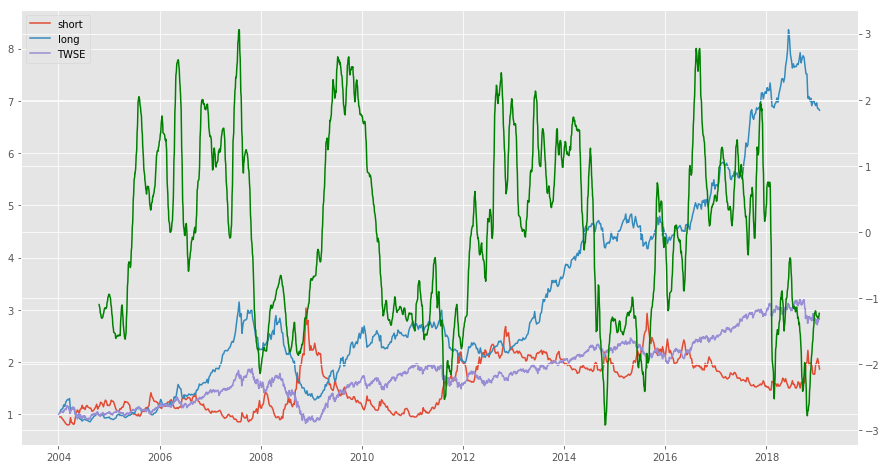

In [158]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(decision_day[1:],cum_return_tax(weight_week_short,short_return),label='short')
plt.plot(decision_day[1:],cum_return_tax(weight_week,long_return),label='long')
plt.plot(TWSE_index["2004-01-01":].index,TWSE_index["2004-01-01":]/TWSE_index["2004-01-01":][0],label='TWSE')
plt.legend()
ax1=plt.twinx()
#ax1.axhline(0)
#ax1.axhline(-1)
#ax1.plot(z_score.index,timing_test[199:],color='g')
ax1.plot(z_score.index,z_score,color='g')
plt.show()

annual_r=0.13768527977392275
annual_ben=0.042802378500476967
annual_s=0.20551110118996005
bench_s=0.3241913920572738


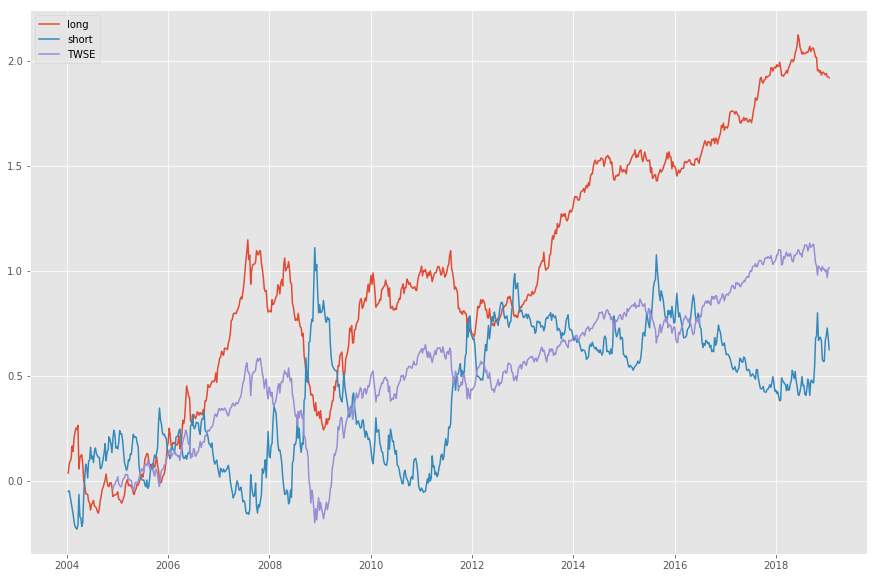

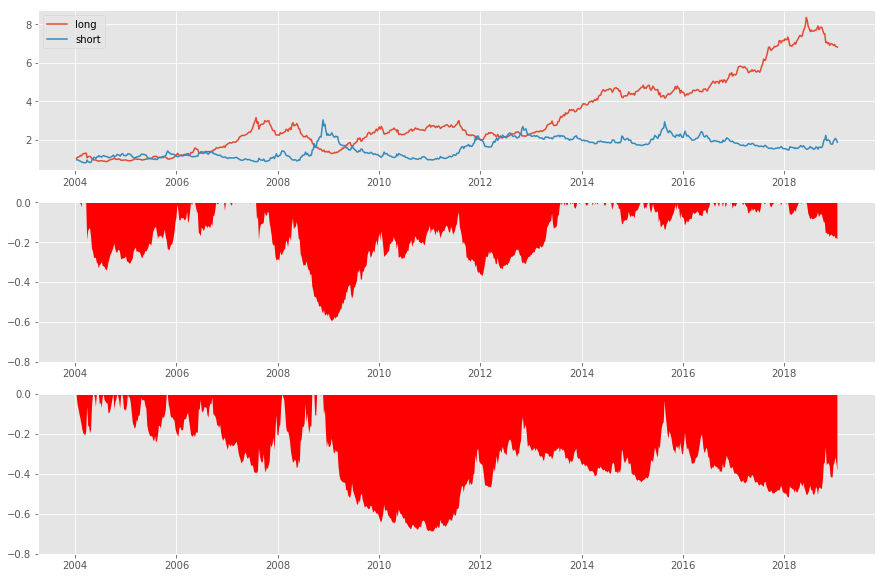

In [196]:
time=long_price.index
time2=TWSE_index_week.index
annual_r=long_price[-1]**(52.0/long_price.shape[0])-1.0
print "annual_r="+ repr(annual_r)
annual_ben=short_price[-1]**(52.0/short_price.shape[0])-1.0
print "annual_ben="+ repr(annual_ben)
import math as m
annual_s=(long_price/long_price.shift(1)).std()*m.sqrt(52)
bench_s=(short_price/short_price.shift(1)).std()*m.sqrt(52)
print "annual_s="+ repr(annual_s)
print "bench_s="+ repr(bench_s)
x=1
drawdown=0
for i in range(1,len(long_price)):
    if long_price[i]>x:
        x=long_price[i]
    drawdown=np.append(drawdown,-(1-long_price[i]/x))
drawdown_world=0
x=1
for i in range(1,len(short_price)):
    if short_price[i]>x:
        x=short_price[i]
    drawdown_world=np.append(drawdown_world,-(1-short_price[i]/x))
fig = plt.figure(figsize=(15,10))
plt.plot(time,np.log(long_price),label='long')
plt.plot(time,np.log(short_price),label='short')
plt.plot(time2,np.log(TWSE_index_week),label='TWSE')
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(time,long_price,label='long')
ax1.plot(time,short_price,label='short')
ax1.legend()
ax2.fill_between(time,0,drawdown,facecolor='red')
ax2.set_ylim(ymax = 0, ymin = -0.8)
ax2.legend()
ax3.fill_between(time,0,drawdown_world,facecolor='red')
ax3.set_ylim(ymax = 0, ymin = -0.8)
ax3.legend()
plt.show()

annual_r=0.23590411152536439
annual_ben=0.075096243136555607
annual_s=0.18992968585605532
bench_s=0.17878883791280067


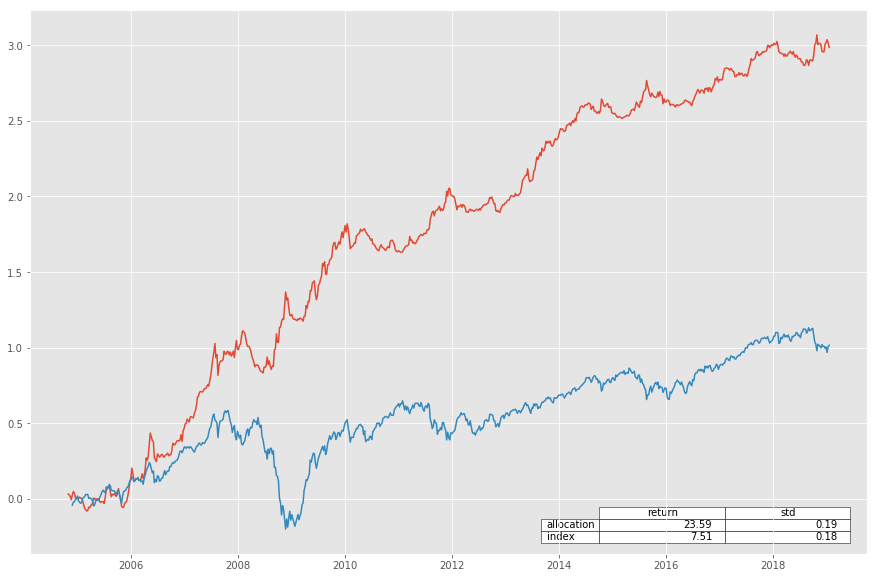

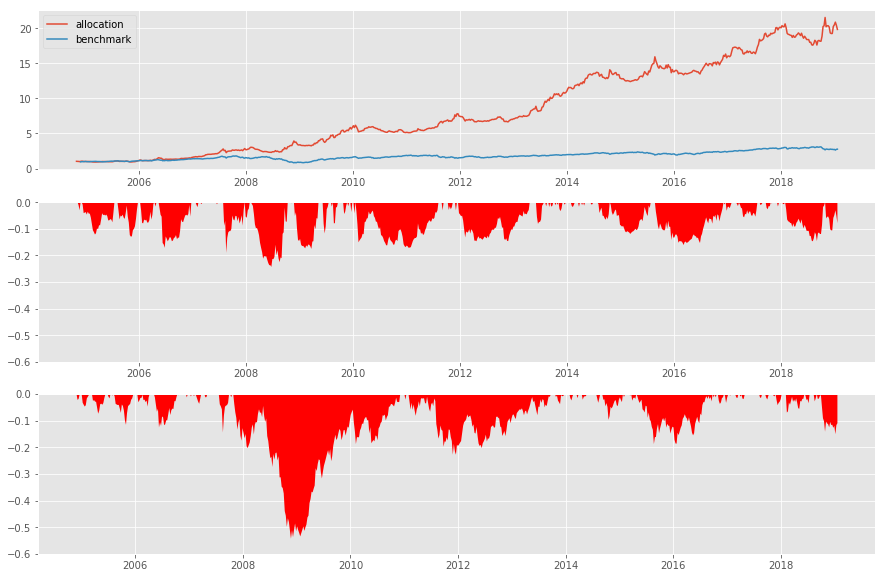

In [193]:
time=longshort_price.index
time2=TWSE_index_week.index
annual_r=longshort_price[-1]**(52.0/longshort_price.shape[0])-1.0
print "annual_r="+ repr(annual_r)
annual_ben=TWSE_index_week[-1]**(52.0/TWSE_index_week.shape[0])-1.0
print "annual_ben="+ repr(annual_ben)
import math as m
annual_s=(longshort_price/longshort_price.shift(1)).std()*m.sqrt(52)
bench_s=(TWSE_index_week/TWSE_index_week.shift(1)).std()*m.sqrt(52)
print "annual_s="+ repr(annual_s)
print "bench_s="+ repr(bench_s)
a=(np.round(annual_r*100,2))
b=(np.round(annual_ben*100,2))
c=(np.round(annual_s,2))
d=(np.round(bench_s,2))
x=1
drawdown=0
for i in range(1,len(longshort_price)):
    if longshort_price[i]>x:
        x=longshort_price[i]
    drawdown=np.append(drawdown,-(1-longshort_price[i]/x))
drawdown_world=0
x=1
for i in range(1,len(TWSE_index_week)):
    if TWSE_index_week[i]>x:
        x=TWSE_index_week[i]
    drawdown_world=np.append(drawdown_world,-(1-TWSE_index_week[i]/x))
fig = plt.figure(figsize=(15,10))
plt.plot(time,np.log(longshort_price))
plt.plot(time2,np.log(TWSE_index_week))
col_labels=['return','std']
row_labels=['allocation','index']
table_vals=[[a,c],[b,d]]
plt.table(cellText=table_vals,rowLabels=row_labels,colLabels=col_labels,loc='lower right',colWidths = [0.15]*3)
plt.show()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(time,longshort_price,label='allocation')
ax1.plot(time2,TWSE_index_week,label='benchmark')
ax1.legend()
ax2.fill_between(time,0,drawdown,facecolor='red')
ax2.set_ylim(ymax = 0, ymin = -0.6)
ax2.legend()
ax3.fill_between(time2,0,drawdown_world,facecolor='red')
ax3.set_ylim(ymax = 0, ymin = -0.6)
ax3.legend()
plt.show()

In [180]:
a=(np.round(annual_r*100,2))
b=(np.round(annual_ben*100,2))
c=(np.round(annual_s,2))
d=(np.round(bench_s,2))

23.59

In [160]:
weight_longshort2=(pd.rolling_mean(long_return_allocation,window=52)>pd.rolling_mean(short_return_allocation,window=52))/1

C:\Users\Sascha683\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=52,center=False).mean()
  """Entry point for launching an IPython kernel.


In [161]:
weight_longshort2=pd.DataFrame(weight_longshort2,columns=["long"])
weight_longshort2["short"]=1-weight_longshort2

In [162]:
weight_longshort2=weight_longshort2.iloc[52:]
longshort_return2=pd.concat([long_price/long_price.shift(1),short_price/short_price.shift(1)],axis=1)
longshort_return2.columns=["long","short"]
longshort_return2=longshort_return2.iloc[52:]

In [163]:
longshort_return2=pd.concat([long_price/long_price.shift(1),short_price/short_price.shift(1)],axis=1)
longshort_return2.columns=["long","short"]
longshort_return2=longshort_return2.iloc[52:]

In [164]:
cum_return_tax(weight_longshort2,longshort_return2)

2005-01-23     0.984205
2005-01-30     0.984876
2005-02-06     0.954020
2005-02-20     0.857528
2005-02-27     0.844122
2005-03-06     0.827243
2005-03-13     0.836463
2005-03-20     0.870819
2005-03-27     0.865115
2005-04-03     0.893797
2005-04-10     0.892518
2005-04-17     0.934605
2005-04-24     0.982680
2005-05-01     0.968138
2005-05-08     0.972117
2005-05-15     0.968572
2005-05-22     0.942179
2005-05-29     0.927551
2005-06-05     0.842408
2005-06-12     0.814624
2005-06-19     0.834027
2005-06-26     0.831902
2005-07-03     0.823377
2005-07-10     0.855202
2005-07-17     0.896735
2005-07-24     0.907831
2005-07-31     0.921243
2005-08-07     0.918995
2005-08-14     0.891062
2005-08-21     0.861101
                ...    
2018-07-01     9.775947
2018-07-08     9.587091
2018-07-15     9.686941
2018-07-22     9.604726
2018-07-29     9.627312
2018-08-05     9.621436
2018-08-12     9.687689
2018-08-19     9.671121
2018-08-26     9.796241
2018-09-02     9.955342
2018-09-09     9

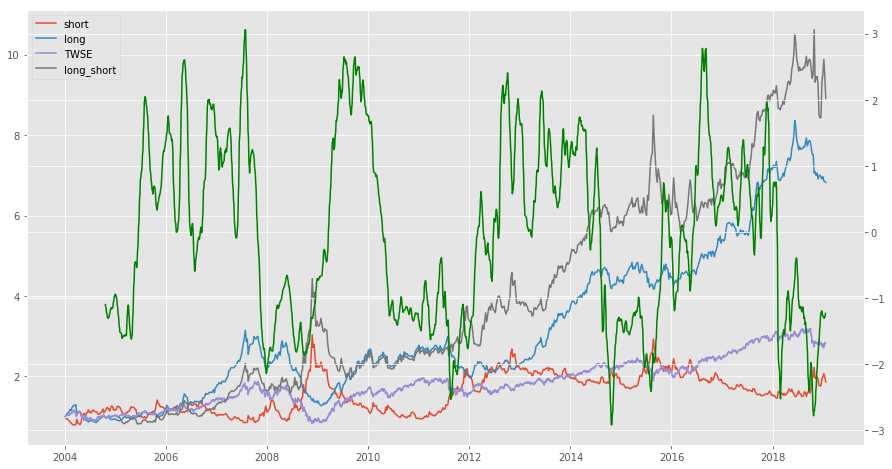

In [165]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(decision_day[1:],cum_return_tax(weight_week_short,short_return),label='short')
plt.plot(decision_day[1:],cum_return_tax(weight_week,long_return),label='long')
plt.plot(TWSE_index["2004-01-01":].index,TWSE_index["2004-01-01":]/TWSE_index["2004-01-01":][0],label='TWSE')
plt.plot(longshort_return2.index[1:],cum_return_tax(weight_longshort2,longshort_return2),label='long_short')
plt.legend()
ax1=plt.twinx()
ax1.plot(z_score.index,z_score,color='g')
plt.show()

In [266]:
TWSE_allfirm_price

,1101 台泥,1102 亞泥,1103 嘉泥,1104 環泥,1108 幸福,1109 信大,1110 東泥,1201 味全,1203 味王,1210 大成,...,9944 新麗,9945 潤泰新,9946 三發地產,9949 琉園,9950 萬國通,9951 皇田,9955 佳龍,9958 世紀鋼,9960 邁達康,9962 有益
年月日,,,,,,,,,,,,,,,,,,,,,
2003-01-02,1.038278,1.026515,1.064846,1.066265,1.067308,1.021622,1.069231,1.033981,1.006711,1.024390,...,0.990196,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-03,1.110048,1.075757,1.064846,1.138555,1.134616,1.043244,1.138462,1.053398,1.020133,1.034146,...,0.990196,0.949580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-06,1.186603,1.143938,1.133106,1.216868,1.211539,1.113514,1.215385,1.126213,1.046979,1.078049,...,0.990196,0.966387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-07,1.267943,1.159090,1.119454,1.186748,1.211539,1.086487,1.261539,1.165048,1.026845,1.043903,...,0.983660,0.941176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-08,1.354068,1.234847,1.126281,1.259037,1.288462,1.124325,1.346155,1.242719,1.067114,1.082927,...,0.977123,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-09,1.406699,1.234847,1.153584,1.277110,1.288462,1.102703,1.338463,1.252428,1.026845,1.053659,...,0.967320,1.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-10,1.377991,1.204544,1.126280,1.228917,1.288462,1.091892,1.261540,1.339806,1.087248,1.092683,...,0.977124,1.025210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-13,1.454547,1.212119,1.105802,1.228917,1.278846,1.156757,1.292309,1.315534,1.161073,1.087805,...,0.973856,0.991596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-14,1.521533,1.196968,1.098976,1.228917,1.317308,1.156757,1.276924,1.349515,1.228187,1.082928,...,0.990196,0.974790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
company_name_allfirm=[]
for i in range(len(TWSE_allfirm_price.columns)):
    company_name_allfirm.append(TWSE_allfirm_price.columns[i][:4])
TWSE_allfirm_price.columns=company_name_allfirm

In [269]:
TWSE_allfirm_return=TWSE_allfirm_price/TWSE_allfirm_price.shift(1)

In [272]:
high_allfirm_point=pd.DataFrame(columns=TWSE_allfirm_price.columns)
for i in range(249,TWSE_allfirm_price.shape[0]):
    high_allfirm_point.loc[TWSE_allfirm_price.index[i]]=TWSE_allfirm_price.iloc[i-249:i,:].max()
relative_allfirm_high=TWSE_allfirm_price.loc["2004-01-01":].div(high_allfirm_point)

In [284]:
TWSE_CLOSE_allfirm_trend=pd.DataFrame(columns=company_name_allfirm)
TWSE_CLOSE_allfirm_mean=pd.DataFrame(columns=company_name_allfirm)
week_end_allfirm_price=pd.DataFrame(columns=company_name_allfirm)
relative_allfirm_high_week=pd.DataFrame(columns=company_name_allfirm)
for i in range(len(week_start)):
    try:
        TWSE_CLOSE_allfirm_trend.loc[week_end[i]]=TWSE_allfirm_price.loc[week_start[i]:week_end[i]].iloc[-1]/TWSE_allfirm_price.loc[week_start[i]:week_end[i]].mean()
        TWSE_CLOSE_allfirm_mean.loc[week_end[i]]=TWSE_allfirm_price.loc[week_start[i]:week_end[i]].mean()
        week_end_allfirm_price.loc[week_end[i]]=TWSE_allfirm_price.loc[week_start[i]:week_end[i]].iloc[-1,:]
        relative_allfirm_high_week.loc[week_end[i]]=relative_high.loc[week_start[i]:week_end[i]].mean()
    except:
        continue

In [290]:
TWSE_CLOSE_allfirm_trend.index=pd.to_datetime(TWSE_CLOSE_allfirm_trend.index)
TWSE_CLOSE_allfirm_mean.index=pd.to_datetime(TWSE_CLOSE_allfirm_mean.index)
week_end_allfirm_price.index=pd.to_datetime(week_end_allfirm_price.index)
relative_allfirm_high_week.index=pd.to_datetime(relative_allfirm_high_week.index)

In [295]:
long_allfirm_return=(week_end_allfirm_price/week_end_allfirm_price.shift(1)).loc["2004-01-01":]
TWSE_CLOSE_allfirm_mean_return=(TWSE_CLOSE_allfirm_mean/TWSE_CLOSE_allfirm_mean.shift(4)).loc["2004-01-01":]
comparetoindex_allfirm=TWSE_CLOSE_allfirm_trend.sub(TWSE_index_trend["trend"],axis=0)
comparetoindex_allfirm=comparetoindex_allfirm.loc["2004-01-01":]
relative_allfirm_high_week=relative_allfirm_high_week.loc["2004-01-01":]
decision_day=comparetoindex_allfirm.index
long_allfirm_return["cash"]=pd.Series(np.ones(long_allfirm_return.shape[0]),index=long_allfirm_return.index)
long_allfirm_return=long_allfirm_return.fillna(1)
short_allfirm_return=1/long_allfirm_return
TWSE_CLOSE_allfirm_trend=TWSE_CLOSE_allfirm_trend.loc["2004-01-01":]
TWSE_CLOSE_allfirm_mean=TWSE_CLOSE_allfirm_mean.loc["2004-01-01":]
week_end_allfirm_price=week_end_allfirm_price.loc["2004-01-01":]
relative_allfirm_high_week=relative_allfirm_high_week.loc["2004-01-01":]

In [300]:
candidate_allfirm_long=pd.DataFrame(columns=company_name_allfirm)
year_now=(2019-decision_day[0].year)*2
top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
for j in range(len(top_weight)):
    top_weight[j]=top_weight[j][:4]
for i in range(len(decision_day)):
    year_now=(2019-decision_day[i].year)*2
    if year_now!=(2019-decision_day[i-1].year)*2 and i>0:
        top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
        for j in range(len(top_weight)):
            top_weight[j]=top_weight[j][:4]
    candidate_allfirm_long.loc[decision_day[i]]=np.zeros(len(company_name_allfirm))
    for j in range(len(company_name_allfirm)):
        if (candidate_allfirm_long.iloc[i,j]==0):
            if(TWSE_CLOSE_allfirm_mean_return.iloc[i,j]>1 and comparetoindex_allfirm.iloc[i,j]>0) and comparetoindex_allfirm.columns[j] in top_weight:
                candidate_allfirm_long.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=1
            else:
                candidate_allfirm_long.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=0
        else:
            if(TWSE_CLOSE_allfirm_mean_return.iloc[i,j]<1 and comparetoindex_allfirm.iloc[i,j]<0):
                candidate_allfirm_long.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=0
            else:
                candidate_allfirm_long.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=1

In [303]:
weight_week_allfirm=pd.DataFrame(columns=company_name_allfirm)
for i in range(candidate_allfirm_long.shape[0]):
    if candidate_allfirm_long.sum(axis=1)[i]>20:
        top_20=(relative_allfirm_high_week)[candidate_allfirm_long.iloc[i,:][candidate_allfirm_long.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[:20].index
        weight_week_allfirm.loc[decision_day[i]]=np.zeros(comparetoindex_allfirm.shape[1])
        weight_week_allfirm.loc[decision_day[i],top_20]=0.05
    else:
        weight_week_allfirm.loc[decision_day[i]]=(candidate_allfirm_long.iloc[i,:]/20).fillna(0)
weight_week_allfirm["cash"]=1-weight_week_allfirm.sum(axis=1)

In [313]:
relative_allfirm_high_week

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
2004-01-04,0.960284,1.055556,0.920462,0.953737,NaN,0.916149,0.982622,0.651825,NaN,0.772455,...,NaN,0.789796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-11,0.990297,0.997849,0.925850,0.962633,NaN,0.924534,0.974658,0.774453,NaN,0.779042,...,NaN,0.797551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-18,0.990183,0.951757,0.881847,0.934875,NaN,0.928261,0.944700,0.816496,NaN,0.767066,...,NaN,0.792245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,0.980039,0.980244,0.910680,0.983541,NaN,1.013760,1.022277,0.916758,NaN,0.770210,...,NaN,0.942857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-08,0.959413,0.953797,0.896857,0.995730,NaN,0.980329,1.019564,0.918897,NaN,0.851833,...,NaN,1.002430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-15,0.996440,1.002550,0.932136,0.976949,NaN,0.971884,0.983587,0.986405,NaN,0.958802,...,NaN,0.991182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-22,0.993755,0.990475,0.963823,0.965404,NaN,0.956787,0.933333,0.978930,NaN,0.972810,...,NaN,0.923274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-29,0.953846,0.954058,0.939192,0.942669,NaN,0.951801,0.937556,0.931884,NaN,0.968874,...,NaN,0.910433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-07,0.979245,1.004218,0.974335,0.958814,NaN,0.983533,0.961333,0.947246,NaN,0.966887,...,NaN,0.940931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-14,0.942453,0.976184,0.942004,0.951236,NaN,0.997538,0.949111,0.994037,NaN,0.998675,...,NaN,1.009813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
long_return_allfirm_allocation=(weight_week_allfirm.shift(1)*long_allfirm_return)[1:].sum(axis=1)
long_allfirm_price=cum_return_tax(weight_week_allfirm,long_allfirm_return)
long_allfirm_price

2004-01-11    1.000000
2004-01-18    1.000000
2004-02-01    1.000000
2004-02-08    0.996000
2004-02-15    0.974466
2004-02-22    1.036850
2004-02-29    1.074494
2004-03-07    1.100166
2004-03-14    1.089311
2004-03-21    1.105445
2004-03-28    0.899899
2004-04-04    0.927442
2004-04-11    0.928209
2004-04-18    0.935646
2004-04-25    0.881253
2004-05-02    0.806951
2004-05-09    0.782568
2004-05-16    0.758549
2004-05-23    0.755176
2004-05-30    0.752503
2004-06-06    0.726744
2004-06-13    0.724029
2004-06-20    0.699473
2004-06-27    0.722039
2004-07-04    0.726148
2004-07-11    0.734740
2004-07-18    0.708991
2004-07-25    0.701565
2004-08-01    0.695108
2004-08-08    0.682027
                ...   
2018-07-01    3.989947
2018-07-08    3.910553
2018-07-15    3.960056
2018-07-22    3.940986
2018-07-29    3.950979
2018-08-05    3.941770
2018-08-12    3.968551
2018-08-19    3.967120
2018-08-26    4.017584
2018-09-02    4.083663
2018-09-09    3.975090
2018-09-16    4.020444
2018-09-23 

In [338]:
candidate_allfirm_short=pd.DataFrame(columns=company_name_allfirm)
year_now=(2019-decision_day[0].year)*2
top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
for j in range(len(top_weight)):
    top_weight[j]=top_weight[j][:4]
for i in range(len(decision_day)):
    candidate_allfirm_short.loc[decision_day[i]]=np.zeros(len(company_name_allfirm))
    year_now=(2019-decision_day[i].year)*2
    if year_now!=(2019-decision_day[i-1].year)*2 and i>0:
        top_weight=pd.DataFrame(TWSE_WEIGHT.iloc[year_now+1,:].values,index=TWSE_WEIGHT.iloc[year_now,:]).dropna().astype(float).sort_values(by=0,ascending=False)[:500].index.tolist()
        for j in range(len(top_weight)):
            top_weight[j]=top_weight[j][:4]
    for j in range(len(company_name_allfirm)):
        if (candidate_allfirm_short.iloc[i,j]==0):
            if(TWSE_CLOSE_allfirm_mean_return.iloc[i,j]<1 and comparetoindex_allfirm.iloc[i,j]<0) and comparetoindex_allfirm.columns[j] in top_weight:
                candidate_allfirm_short.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=1
            else:
                candidate_allfirm_short.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=0
        else:
            if(TWSE_CLOSE_allfirm_mean_return.iloc[i,j]>1 and comparetoindex_allfirm.iloc[i,j]>0):
                candidate_allfirm_short.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=0
            else:
                candidate_allfirm_short.loc[decision_day[i],comparetoindex_allfirm.columns[j]]=1

In [376]:
weight_week_short_allfirm=pd.DataFrame(columns=company_name_allfirm)
for i in range(candidate_allfirm_short.shape[0]):
    if candidate_allfirm_short.sum(axis=1)[i]>20:
        top_20=(relative_allfirm_high_week)[candidate_allfirm_short.iloc[i,:][candidate_allfirm_short.iloc[i,:]>0].index].iloc[i,:].sort_values(ascending=False)[-20:].index
        weight_week_short_allfirm.loc[decision_day[i]]=np.zeros(comparetoindex_allfirm.shape[1])
        weight_week_short_allfirm.loc[decision_day[i],top_20]=0.05
    else:
        weight_week_short_allfirm.loc[decision_day[i]]=(candidate_allfirm_short.iloc[i,:]/20).fillna(0)
weight_week_short_allfirm["cash"]=1-weight_week_short_allfirm.sum(axis=1)

In [377]:
short_return_allfirm_allocation=(weight_week_short_allfirm.shift(1)*short_allfirm_return)[1:].sum(axis=1)
short_allfirm_price=cum_return_tax(weight_week_short_allfirm,short_allfirm_return)
short_allfirm_price

2004-01-11    1.000000
2004-01-18    1.000000
2004-02-01    1.000000
2004-02-08    0.996000
2004-02-15    0.973208
2004-02-22    0.942357
2004-02-29    0.920509
2004-03-07    0.912152
2004-03-14    0.904358
2004-03-21    0.929301
2004-03-28    1.054432
2004-04-04    0.939496
2004-04-11    0.938606
2004-04-18    0.906104
2004-04-25    0.926534
2004-05-02    1.040214
2004-05-09    1.090584
2004-05-16    1.129203
2004-05-23    1.093446
2004-05-30    1.080587
2004-06-06    1.115586
2004-06-13    1.091771
2004-06-20    1.145418
2004-06-27    1.114758
2004-07-04    1.129660
2004-07-11    1.115841
2004-07-18    1.151258
2004-07-25    1.225722
2004-08-01    1.196108
2004-08-08    1.184268
                ...   
2018-07-01    1.313489
2018-07-08    1.356673
2018-07-15    1.304923
2018-07-22    1.303190
2018-07-29    1.289241
2018-08-05    1.272010
2018-08-12    1.294725
2018-08-19    1.350275
2018-08-26    1.363094
2018-09-02    1.314279
2018-09-09    1.364227
2018-09-16    1.385309
2018-09-23 

In [378]:
weight_longshort

,long,short,cash
2004-10-24,0.0,0.50,0.50
2004-10-31,0.0,0.50,0.50
2004-11-07,0.0,0.50,0.50
2004-11-14,0.0,0.50,0.50
2004-11-21,0.0,0.50,0.50
2004-11-28,0.0,0.50,0.50
2004-12-05,0.0,0.50,0.50
2004-12-12,0.0,0.50,0.50
2004-12-19,0.0,0.50,0.50
2004-12-26,0.5,0.25,0.25


In [379]:
return_longshort_allfirm=pd.concat([(long_allfirm_price/long_allfirm_price.shift(1))[40:],(short_allfirm_price/short_allfirm_price.shift(1))[40:],pd.DataFrame(np.ones(len(long_allfirm_price)-40),index=long_allfirm_price.index[40:])],axis=1)
return_longshort_allfirm.columns=["long","short","cash"]

In [399]:
(long_allfirm_price/long_allfirm_price.shift(1))[40:]

2004-10-24    0.988036
2004-10-31    0.997989
2004-11-07    1.020715
2004-11-14    1.006908
2004-11-21    0.979900
2004-11-28    0.963927
2004-12-05    1.009301
2004-12-12    0.996215
2004-12-19    1.011776
2004-12-26    1.009688
2005-01-02    1.011013
2005-01-09    0.969416
2005-01-16    0.994656
2005-01-23    0.997229
2005-01-30    0.993714
2005-02-06    1.008552
2005-02-20    1.015622
2005-02-27    1.024467
2005-03-06    1.005942
2005-03-13    1.004189
2005-03-20    0.984619
2005-03-27    1.002342
2005-04-03    0.981415
2005-04-10    1.012253
2005-04-17    0.975107
2005-04-24    0.988278
2005-05-01    0.992724
2005-05-08    1.030871
2005-05-15    0.999983
2005-05-22    1.023541
                ...   
2018-07-01    0.990591
2018-07-08    0.980102
2018-07-15    1.012659
2018-07-22    0.995184
2018-07-29    1.002536
2018-08-05    0.997669
2018-08-12    1.006794
2018-08-19    0.999639
2018-08-26    1.012721
2018-09-02    1.016447
2018-09-09    0.973413
2018-09-16    1.011410
2018-09-23 

In [426]:
return_longshort_TWSE=pd.concat([TWSE_index_week_return,1/TWSE_index_week_return,pd.DataFrame(np.ones(len(TWSE_index_week_return)),index=TWSE_index_week_return.index)],axis=1)
return_longshort_TWSE.columns=["long","short","cash"]

In [429]:
longshort_price_allfirm=cum_return_tax(weight_longshort,return_longshort_allfirm)

In [450]:
longshort_price_TWSE=cum_return_tax(weight_longshort,return_longshort_TWSE)

In [428]:
TWSE_index_week

,price
2004-10-31,0.988098
2004-11-07,1.027125
2004-11-14,1.024693
2004-11-21,1.043635
2004-11-28,1.000706
2004-12-05,1.020555
2004-12-12,1.023734
2004-12-19,1.040651
2004-12-26,1.042514
2005-01-02,1.063343


annual_r=0.19433973282482508
annual_ben=0.077932561069172124
annual_s=0.16391852624187322
bench_s=0.17900789753344884


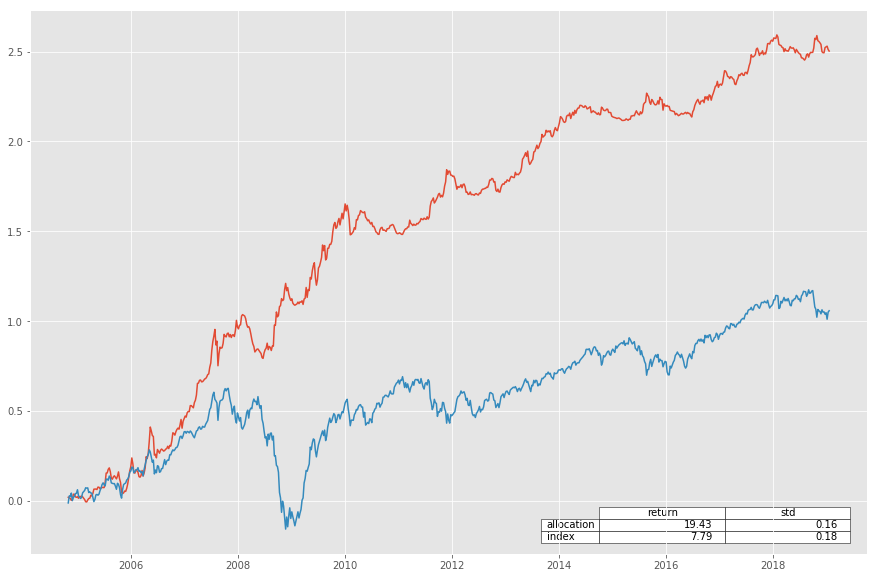

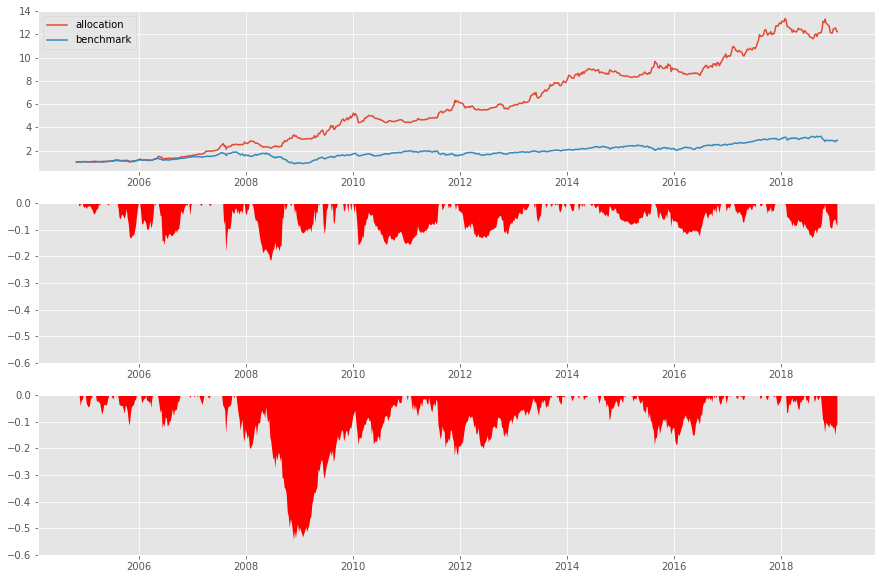

In [441]:
time=longshort_price_allfirm.index
annual_r=longshort_price_allfirm[-1]**(52.0/longshort_price_allfirm.shape[0])-1.0
print "annual_r="+ repr(annual_r)
annual_ben=TWSE_index_week[-1]**(52.0/TWSE_index_week.shape[0])-1.0
print "annual_ben="+ repr(annual_ben)
import math as m
annual_s=(longshort_price_allfirm/longshort_price_allfirm.shift(1)).std()*m.sqrt(52)
bench_s=(TWSE_index_week/TWSE_index_week.shift(1)).std()*m.sqrt(52)
print "annual_s="+ repr(annual_s)
print "bench_s="+ repr(bench_s)
a=(np.round(annual_r*100,2))
b=(np.round(annual_ben*100,2))
c=(np.round(annual_s,2))
d=(np.round(bench_s,2))
x=1
drawdown=0
for i in range(1,len(longshort_price_allfirm)):
    if longshort_price_allfirm[i]>x:
        x=longshort_price_allfirm[i]
    drawdown=np.append(drawdown,-(1-longshort_price_allfirm[i]/x))
drawdown_world=0
x=1
for i in range(1,len(TWSE_index_week)):
    if TWSE_index_week[i]>x:
        x=TWSE_index_week[i]
    drawdown_world=np.append(drawdown_world,-(1-TWSE_index_week[i]/x))
fig = plt.figure(figsize=(15,10))
plt.plot(time,np.log(longshort_price_allfirm))
plt.plot(time,np.log(TWSE_index_week))
col_labels=['return','std']
row_labels=['allocation','index']
table_vals=[[a,c],[b,d]]
plt.table(cellText=table_vals,rowLabels=row_labels,colLabels=col_labels,loc='lower right',colWidths = [0.15]*3)
plt.show()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(time,longshort_price_allfirm,label='allocation')
ax1.plot(time,TWSE_index_week,label='benchmark')
ax1.legend()
ax2.fill_between(time,0,drawdown,facecolor='red')
ax2.set_ylim(ymax = 0, ymin = -0.6)
ax2.legend()
ax3.fill_between(time,0,drawdown_world,facecolor='red')
ax3.set_ylim(ymax = 0, ymin = -0.6)
ax3.legend()
plt.show()

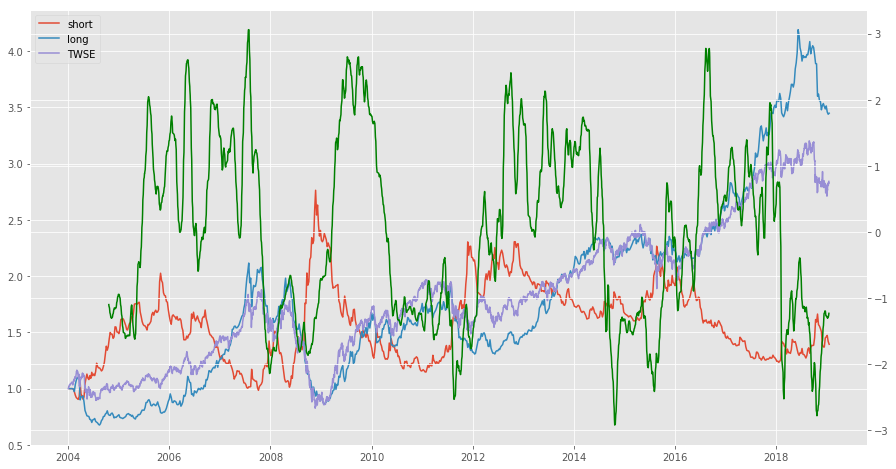

In [445]:
plt.style.use('ggplot')    
plt.figure(figsize=(15,8))
plt.plot(decision_day[1:],short_allfirm_price,label='short')
plt.plot(decision_day[1:],long_allfirm_price,label='long')
plt.plot(TWSE_index["2004-01-01":].index,TWSE_index["2004-01-01":]/TWSE_index["2004-01-01":][0],label='TWSE')
plt.legend()
ax1=plt.twinx()
ax1.plot(z_score.index,z_score,color='g')
plt.show()

annual_r=0.13768527977392275
annual_ben=0.022572558422031319
annual_s=0.1980126024670315
bench_s=0.245665099733237


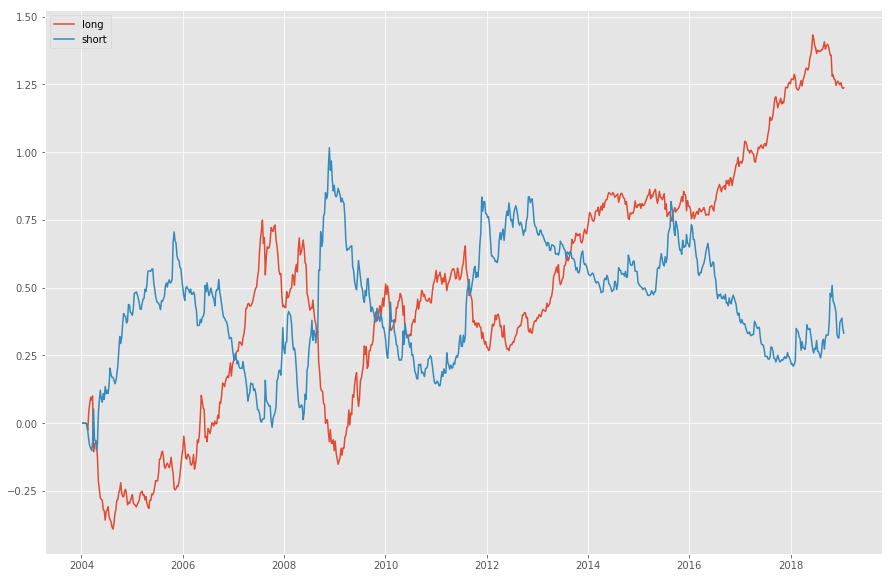

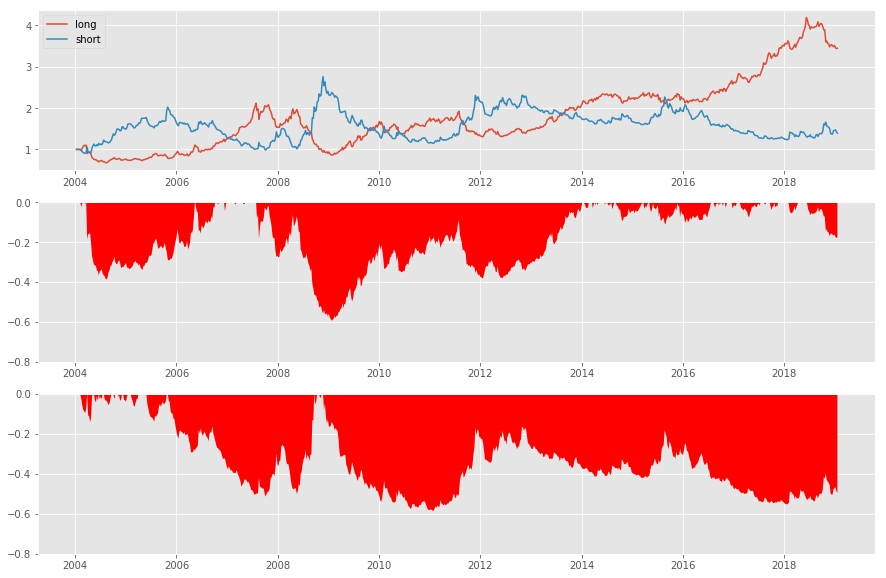

In [449]:
time=long_allfirm_price.index
annual_r=long_price[-1]**(52.0/long_allfirm_price.shape[0])-1.0
print "annual_r="+ repr(annual_r)
annual_ben=short_allfirm_price[-1]**(52.0/short_allfirm_price.shape[0])-1.0
print "annual_ben="+ repr(annual_ben)
import math as m
annual_s=(long_allfirm_price/long_allfirm_price.shift(1)).std()*m.sqrt(52)
bench_s=(short_allfirm_price/short_allfirm_price.shift(1)).std()*m.sqrt(52)
print "annual_s="+ repr(annual_s)
print "bench_s="+ repr(bench_s)
x=1
drawdown=0
for i in range(1,len(long_allfirm_price)):
    if long_allfirm_price[i]>x:
        x=long_allfirm_price[i]
    drawdown=np.append(drawdown,-(1-long_allfirm_price[i]/x))
drawdown_world=0
x=1
for i in range(1,len(short_allfirm_price)):
    if short_allfirm_price[i]>x:
        x=short_allfirm_price[i]
    drawdown_world=np.append(drawdown_world,-(1-short_allfirm_price[i]/x))
fig = plt.figure(figsize=(15,10))
plt.plot(time,np.log(long_allfirm_price),label='long')
plt.plot(time,np.log(short_allfirm_price),label='short')
plt.legend()
plt.show()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(time,long_allfirm_price,label='long')
ax1.plot(time,short_allfirm_price,label='short')
ax1.legend()
ax2.fill_between(time,0,drawdown,facecolor='red')
ax2.set_ylim(ymax = 0, ymin = -0.8)
ax2.legend()
ax3.fill_between(time,0,drawdown_world,facecolor='red')
ax3.set_ylim(ymax = 0, ymin = -0.8)
ax3.legend()
plt.show()

annual_r=0.099300708138227556
annual_ben=0.077932561069172124
annual_s=0.1267366583777833
bench_s=0.17900789753344884


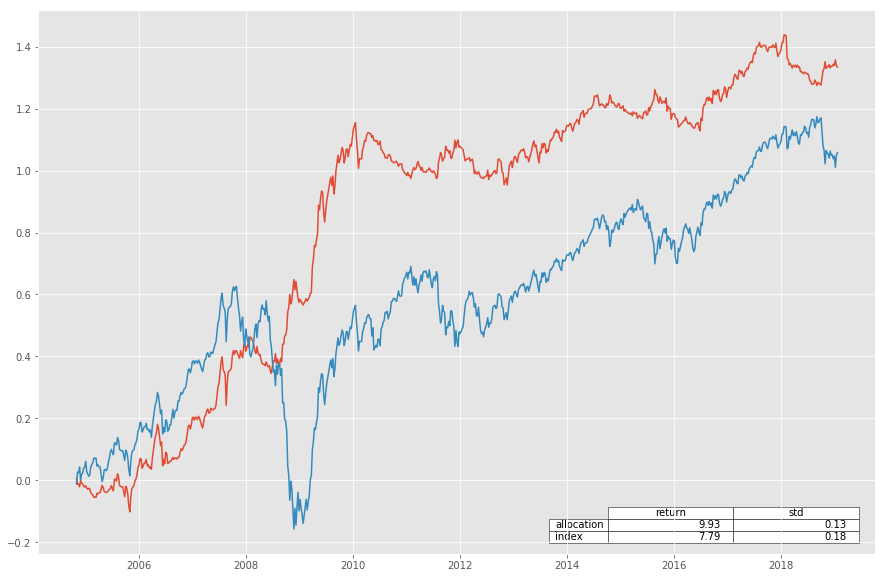

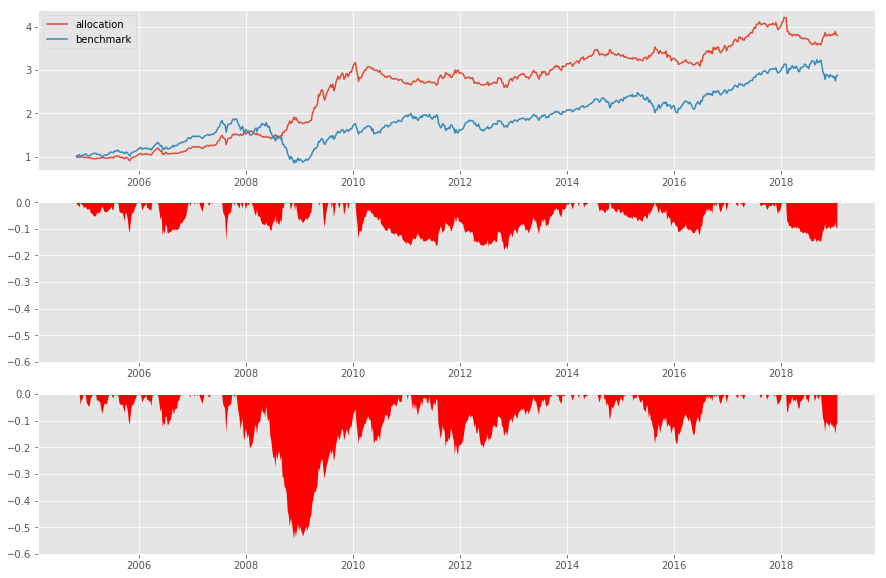

In [452]:
time=longshort_price_TWSE.index
annual_r=longshort_price_TWSE[-1]**(52.0/longshort_price_TWSE.shape[0])-1.0
print "annual_r="+ repr(annual_r)
annual_ben=TWSE_index_week[-1]**(52.0/TWSE_index_week.shape[0])-1.0
print "annual_ben="+ repr(annual_ben)
import math as m
annual_s=(longshort_price_TWSE/longshort_price_TWSE.shift(1)).std()*m.sqrt(52)
bench_s=(TWSE_index_week/TWSE_index_week.shift(1)).std()*m.sqrt(52)
print "annual_s="+ repr(annual_s)
print "bench_s="+ repr(bench_s)
a=(np.round(annual_r*100,2))
b=(np.round(annual_ben*100,2))
c=(np.round(annual_s,2))
d=(np.round(bench_s,2))
x=1
drawdown=0
for i in range(1,len(longshort_price_TWSE)):
    if longshort_price_TWSE[i]>x:
        x=longshort_price_TWSE[i]
    drawdown=np.append(drawdown,-(1-longshort_price_TWSE[i]/x))
drawdown_world=0
x=1
for i in range(1,len(TWSE_index_week)):
    if TWSE_index_week[i]>x:
        x=TWSE_index_week[i]
    drawdown_world=np.append(drawdown_world,-(1-TWSE_index_week[i]/x))
fig = plt.figure(figsize=(15,10))
plt.plot(time,np.log(longshort_price_TWSE))
plt.plot(time,np.log(TWSE_index_week))
col_labels=['return','std']
row_labels=['allocation','index']
table_vals=[[a,c],[b,d]]
plt.table(cellText=table_vals,rowLabels=row_labels,colLabels=col_labels,loc='lower right',colWidths = [0.15]*3)
plt.show()
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)
ax1.plot(time,longshort_price_TWSE,label='allocation')
ax1.plot(time,TWSE_index_week,label='benchmark')
ax1.legend()
ax2.fill_between(time,0,drawdown,facecolor='red')
ax2.set_ylim(ymax = 0, ymin = -0.6)
ax2.legend()
ax3.fill_between(time,0,drawdown_world,facecolor='red')
ax3.set_ylim(ymax = 0, ymin = -0.6)
ax3.legend()
plt.show()